<a href="https://colab.research.google.com/github/captaindataa/csv-datascience/blob/CSV%23datascience/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Spam Detection**




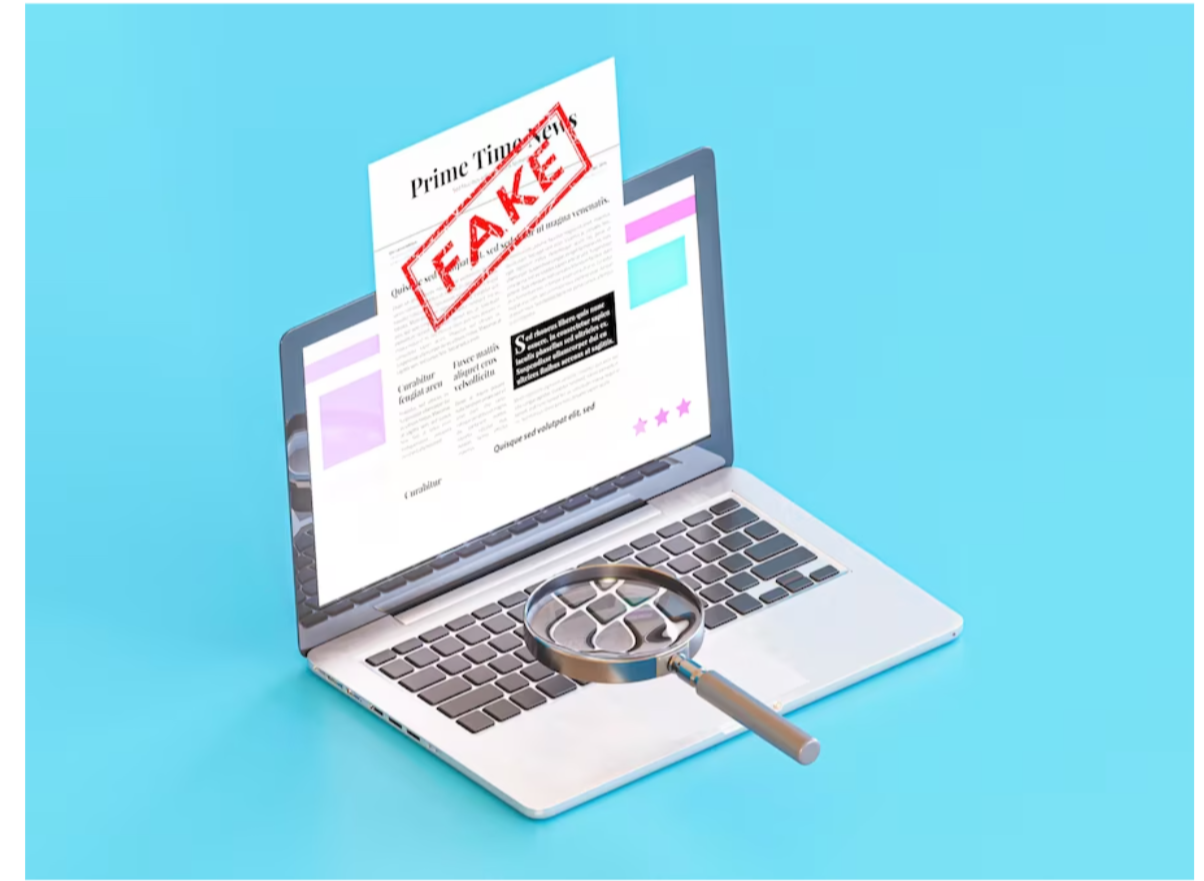

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/spam.csv')

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


# Dropped The Column Unnamed: 0



In [ ]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df['Spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df['Spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.tail(5)

,Category,Message,Spam
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

In [ ]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

**Naive Bayes Have three Classifier(Bernouli,Multinominal,Gaussian) Here I use Multinominal Bayes Because here data in a discrete form discrete data**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

# Training The Model


In [ ]:

clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

Here I given Two email To detect, 1st One is looking good and the other one looking spam!



In [ ]:
emails=[
    'Sorry Ill call later',
    '	Free entry in 2 a wkly comp to win FA Cup final'
]

*Predict Email*

In [ ]:
clf.predict(emails)

array([0, 1])

# Prediction Of Model

In [ ]:
clf.score(X_test,y_test)

0.9863603732950467